In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

%matplotlib inline

plt.style.use('ggplot')


Bad key "text.kerning_factor" on line 4 in
/home/moon23k/anaconda3/envs/Basic_conda_env/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = pd.read_csv('data/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Serial          3593 non-null   int64  
 1   INCIDENT TITLE  3593 non-null   object 
 2   INCIDENT DATE   3593 non-null   object 
 3   LOCATION        3592 non-null   object 
 4   DESCRIPTION     3593 non-null   object 
 5   CATEGORY        3587 non-null   object 
 6   LATITUDE        3593 non-null   float64
 7   LONGITUDE       3593 non-null   float64
 8   APPROVED        3593 non-null   object 
 9   VERIFIED        3593 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [3]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [4]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

이 데이터릐 요약을 보면 몇몇 카테고리가 빠져있는 것을 확인할 수 있다.
카테고리가 누락된 데이터를 제외시키고 describe 메서드를 호풀하여 이상한 위치값을 지닌 것이 있는지 확인해본다

In [5]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


잘못된 위치 정보와 누락된 카테고리는 다음처럼 간단하게 제거 할 수 있다.

In [6]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) & 
            (data.LONGITUDE < -70) & data.CATEGORY.notnull()]

data.head(10)

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO
11,4035,Clogged toilet in canape vert,19/03/2010 10:19,Canape Vert,Please give the message for with the concern O...,"4. Menaces | Security Threats, 4e. Assainissem...",18.539513,-72.327118,YES,NO
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO


이제 카테고리별 분석이나 시각화를 해보자.
각 카테고리 필드에는 다수의 카테고리가 존재할 수 있다.
그리고 각 카테고리는 코드와 영어, 불어 코드 이름으로 구성되어 있다.
그래서 데이터를 좀 더 쉽게 처리할 수 있도록 약간의 수고가 필요하다.
존재하는 모든 카테고리를 추출해서 카테고리 코드와 영어 이름으로 분히되도록 다음과 같은 함수를 작성한다.

In [7]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

get_english 함수 정상 동작 테스트

In [8]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [9]:
all_cats = get_all_categories(data.CATEGORY)

english_mapping = dict(get_english(x) for x in all_cats)

print(english_mapping['2a'])
# this is food shortage

print(english_mapping['6c'])
# Earthquake and aftershock

Food Shortage
Earthquake and aftershocks


카테고리 별로 내역을 쉽게 모을 수 있도록 데이터를 확장하는 다양한 방법이 있다.
그 중 하나는 식별용(더미) 컬럼을 각 카테고리에 하나씩 추가하는 것인데,
그러려면 먼저 중복되지 않는 카테고리 코드를 뽑아낸 다음 data와 같은 색인을 갖는
DataFrame 객체에 값을 모두 0으로 채워넣어야 한다.

In [10]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = pd.DataFrame(np.zeros((len(data), len(code_index))), index=data.index, columns=code_index)

In [11]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       3569 non-null   float64
 1   1a      3569 non-null   float64
 2   1b      3569 non-null   float64
 3   1c      3569 non-null   float64
 4   1d      3569 non-null   float64
 5   2       3569 non-null   float64
dtypes: float64(6)
memory usage: 195.2 KB


여기에 적절한 로우는 1로 설정하고 마지막에 data와 조인한다.

In [12]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [13]:
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category_1   3569 non-null   float64
 1   category_1a  3569 non-null   float64
 2   category_1b  3569 non-null   float64
 3   category_1c  3569 non-null   float64
 4   category_1d  3569 non-null   float64
dtypes: float64(5)
memory usage: 327.3 KB


데이터의 정제는 어느정도 완료되었으니,이제 데이터를 기반으로 도표를 만들 차례이다.
이 데이터는 지리 정보이므로 카테고리별 데이터를 아이티 지도 위에 그린다.
matplotlib의 확장 툴킷인 basemap 틀킷을 사용해서 파이썬으로 지도 위에 2차원 데이터 도표를 그릴 수 있다.
basemap은 여러가지 지도 투영법을 지원하며 위도 경도 좌표를 2차원 평면 matplotlib의 좌표로 변환 가능하다.
이 데이터를 가지고 간단한 흑백 아이티 지도를 그리는 함수를 작성한다.

In [14]:
from mpl_toolkits.basemap import Basemap

In [15]:
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    m = Basemap(ax=ax, projection='stere',
               lon_0=(urlon + lllon) /2,
               lat_0=(urlat + lllat) /2,
               llcrnrlat=lllat, urcrnrlat=urlat,
               llcrnrlon=lllon, urcrnrlon=urlon,
               resolution='i')
    
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

<ipython-input-15-32e1ee2bae3a>:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(ax=ax, projection='stere',
<ipython-input-15-32e1ee2bae3a>:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawstates()
<ipython-input-15-32e1ee2bae3a>:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries()
<ipython-input-15-32e1ee2bae3a>:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(ax=ax, projection='stere',
<ipython-input-15-32e1ee2bae3a>:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc in

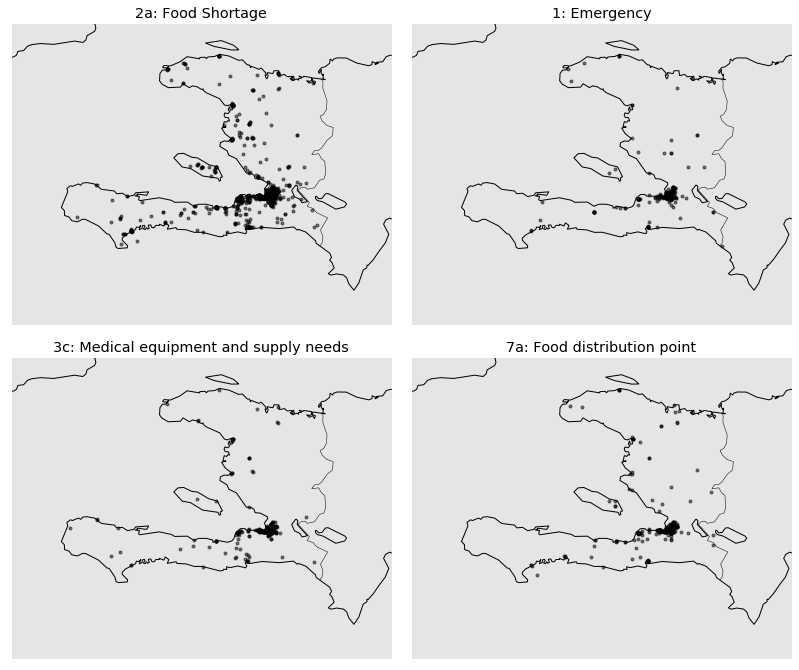

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat = 17.25
urlat = 20.25
lllon = -75
urlon = -71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
    cat_data = data[data['category_%s' % code] == 1]
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)
    
    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

plt.show()

In [ ]:
shapefile_path = 'data/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshape